**ML COURSE 2024-2025**
# Extra: An intro to Git and GitHub

## 0. Definitions

### Repository (repo)
- It is similar to a **folder** where you store all the files related to a software project (scripts, notebooks, images, documents). 
- But with **extra features**: 
    - can track all changes automatically: every time you modify a file, the repository _can_ save a history of edits, allowing you to revert previous versions if needed. 
- A repo can exist **locally** (on your computer) or **remotely** (on platforms like GitHub) to share with others. 


### Git 
It is a tool to manage repositories. It is a version control system, which means it helps track changes in files over time (a history).

No need to save multiple versions of a file manually (like _"project", "project_final", "project_final_final", "project_final_for_real"_). Git helps you to keep history of all edits. 

**With Git, with a special command, you can save different versions of your project and go back to any previous saved state**.


### GitHub
GitHub is a cloud storage for hosting Git repositories. You can:  
✅ back up your project online, so you never lose work.  
✅ share your repository with others, enabling collaboration. 

## 1. View and download repo from browser

Download the entire repo or individual files from a public project **without** version history: 

1. Go to [github.com](https://github.com/).
2. Search for a public repository of interest (e.g. https://github.com/AMCO-UniPD/ML_lab_DEI_public)
3. Explore files and folders. 
4. Download: 
    - entire repository (Code > Download ZIP) as below. Once the zip file is downloaded, you can unzip it and upload on JupyterLab, for example.
    - single file: open it by clicking on it, then click the Download icon.  

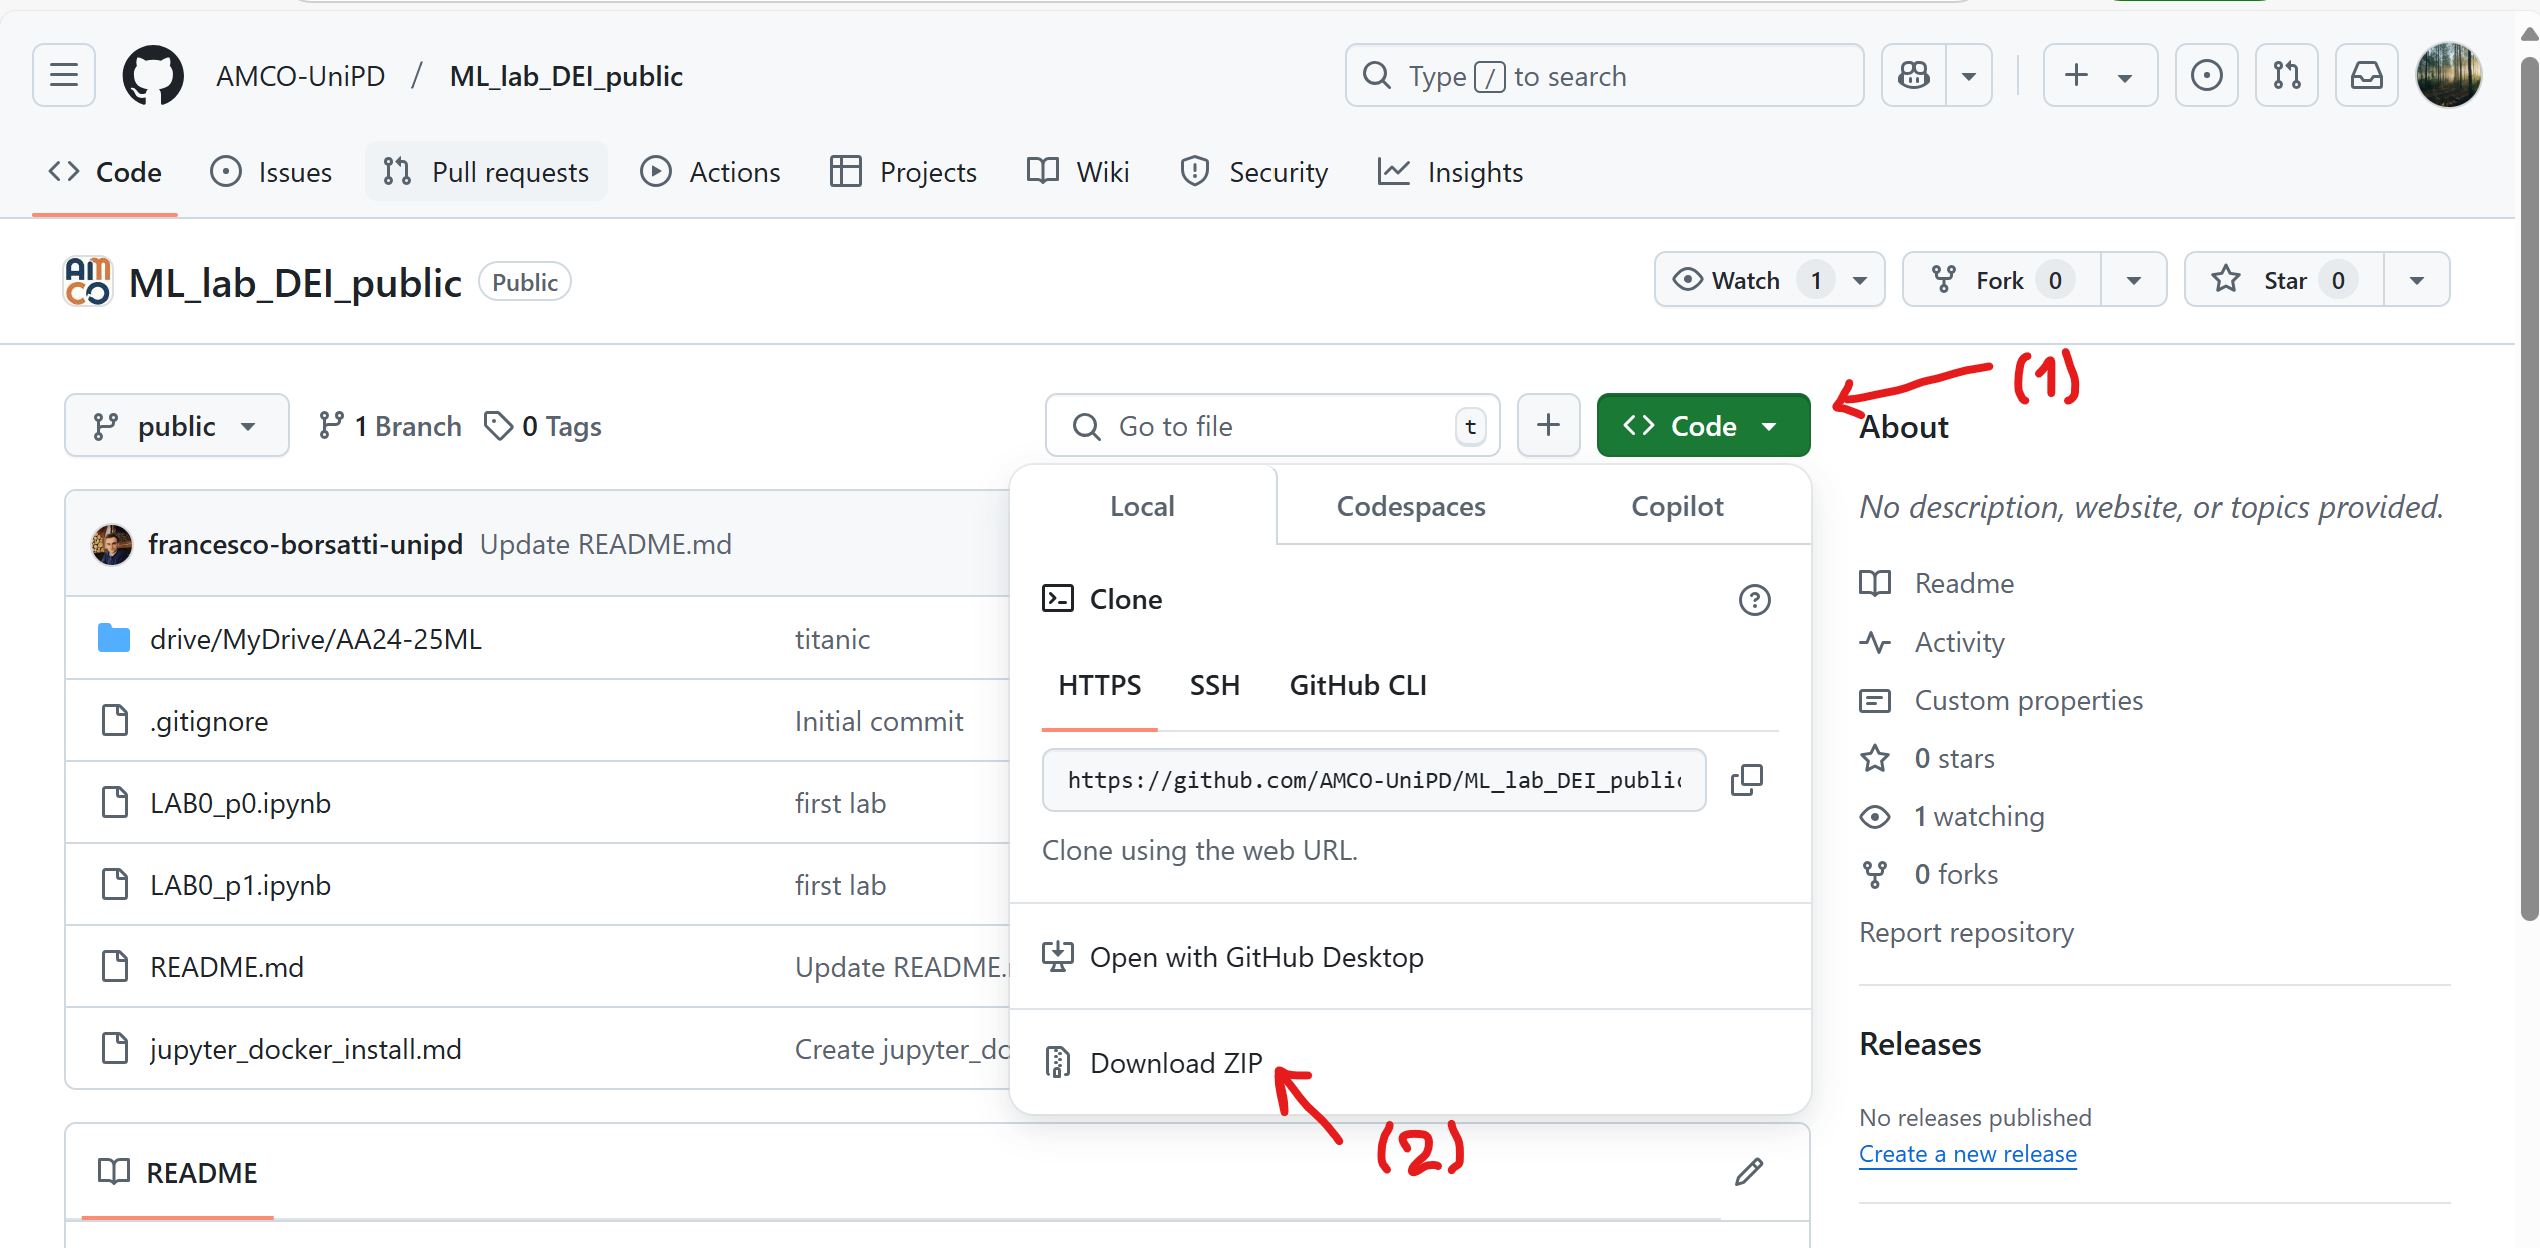
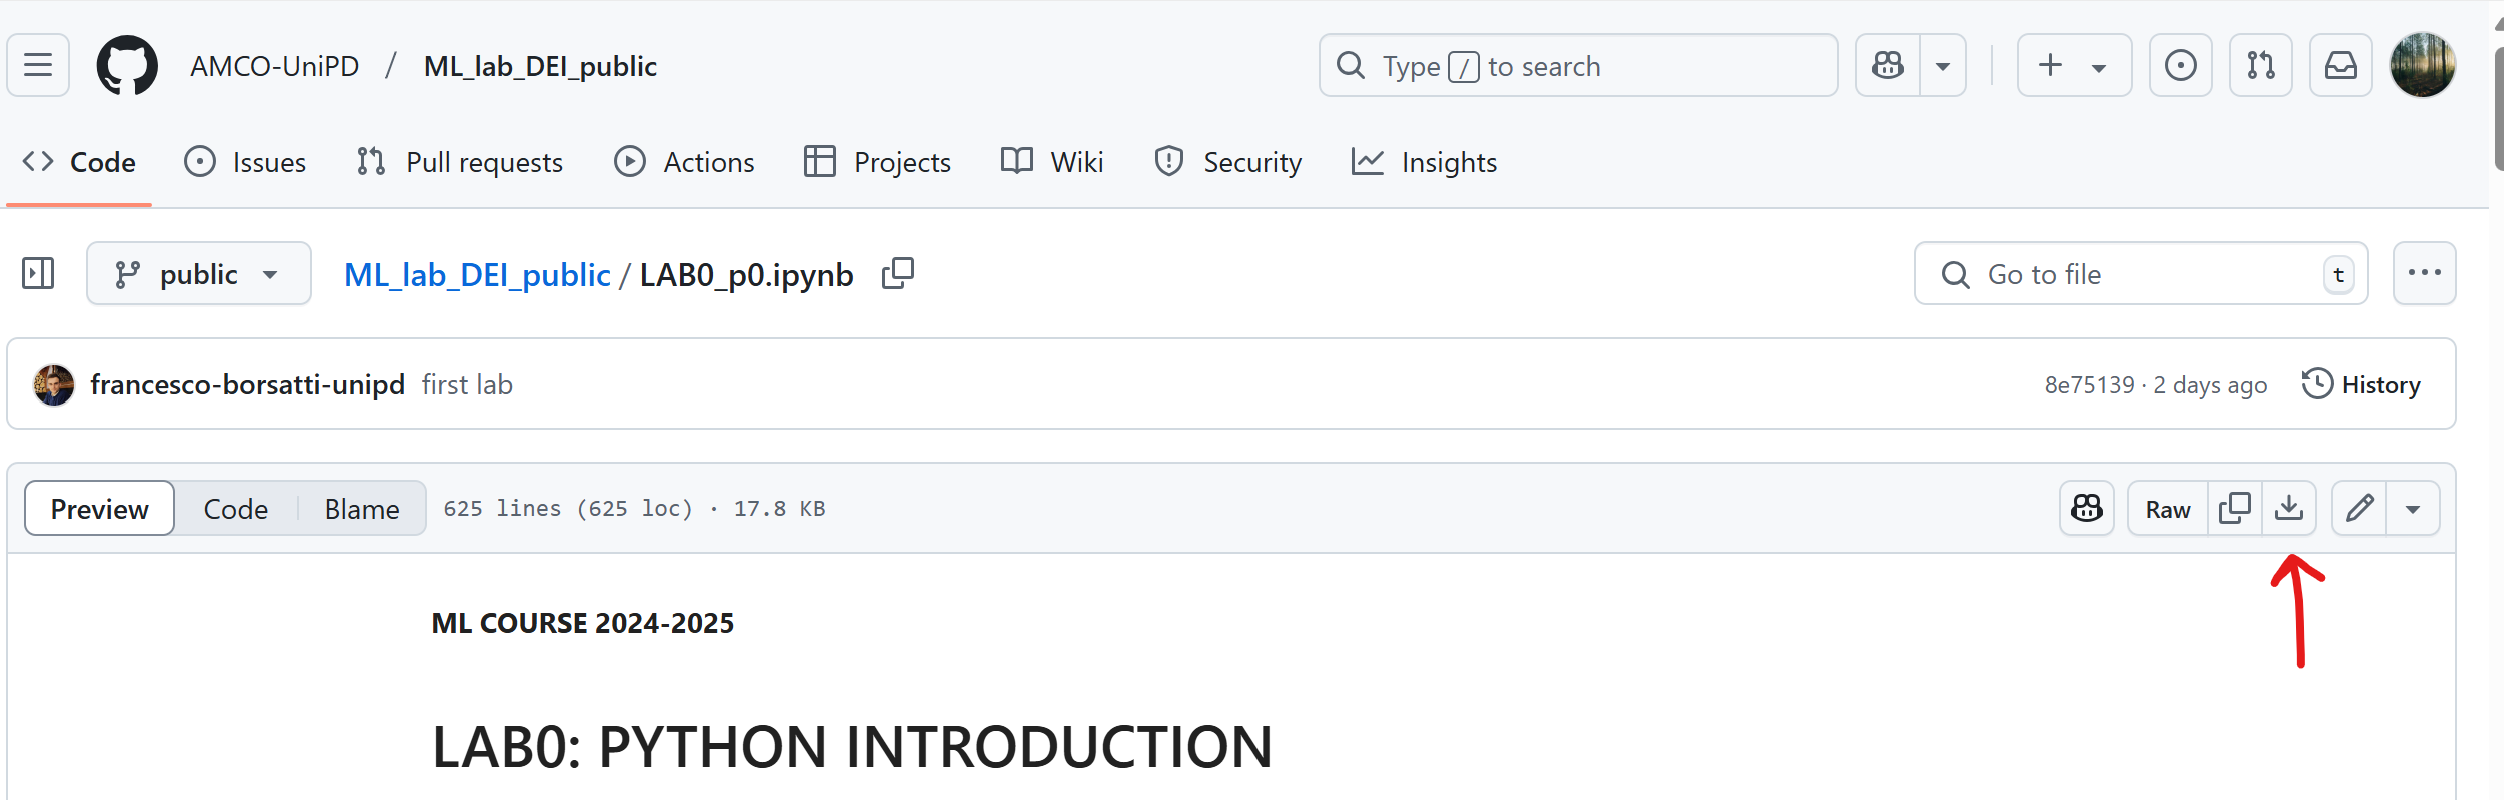

## 2. Git

> ⚠️ **Warning!** Each Git command we will see can be run directly in the terminal,  or inside a notebook by adding `!` before the command.  For example: 
> - **Terminal:** `git status`  
> - **Notebook:** `!git status`

### 2.0 🔧 Installation and initial configuration 

Follow these steps the first time you are using Git in a system. 

**Installation**. 
Git must be installed:
- If you have followed the JupyterLab installation via Docker, Git is already available. Open the terminal or a notebook. 
- If you are using Google Colab, Git is already installed.
- Otherwise, you need to install it. Refer to the [official Git guide](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git).

**Initial Configuration**. 
Set your name and email. Warning: these will appear in the commit history. 

> Note: if you have a GitHub account, use the same username and email to ensure your commits are correctly attributed to your account. 

In [1]:
set_username_command = "git config --global user.name 'Your Name'"
set_email_command = "git config --global user.email 'youremail@example.com'"

# check if the username and email are set
# if not, set them
c = f"""
if [ -z "$(git config --global --get user.name)" ]; then
    {set_username_command}
fi
if [ -z "$(git config --global --get user.email)" ]; then
    {set_email_command}
fi
"""

!{c}

### 2.1 🆕 Clone or initialize a repository

In [2]:
from pathlib import Path

p = "git-example"
p = Path(p)

if p.exists():
    print("Directory exists")
    !rm -rf git-example

p.mkdir(exist_ok=True)

# Change directory to perform the example git commands
%cd git-example/

Directory exists
/tutor_ML_AA24-25/ML_lab_DEI/git-example


These commands will create a **local** repository (copied or new) in your machine. Your folder will have a .git subfolder, indicating that now is a repository.

In [3]:
# Initialize an empty Git repository in the folder where the notebook is or in the folder you are in the terminal. 
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /tutor_ML_AA24-25/ML_lab_DEI/git-example/.git/


In [4]:
# Clone (download) an existing repository on your local machine: git clone REPOSITORY_URL
!git clone https://github.com/AMCO-UniPD/ML_lab_DEI_public

Cloning into 'ML_lab_DEI_public'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 3), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 1.73 MiB | 9.27 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
# remove the cloned repository (we already have it)
!rm -rf ML_lab_DEI_public

### 2.2 🔎 Check repository status

Show the state of each file in your repository. The possible states of a file are: 

|  | **Status**   | **Description** | **Category in `git status`** |
|----|------------|-------------------------------|----------------------------|  
| ❌ | Untracked | New file, not tracked by Git yet. | Untracked files |
| 📝  | Modified  | Tracked file is changed but not staged. | Changes not staged for commit |
| 📥 | Staged    | File is ready for commit (added to **staging area**). | Changes to be committed |
| ✅ | Committed | Changes are saved in the **local Git history**. | _(Not shown in `git status`)_ |
| ⚪ | Pushed (GitHub only) | Changes are saved and uploaded in the remote repository (see below). | _(Not shown in `git status` but visible on GitHub)_ |


Before committing, i.e. saving the changes in the history, new and modified files must be staged. 

In [6]:
# create an example file
!echo "Hello, world!" > hello.txt

# We can see that there is a new file in the repository, that is not currently tracked by git
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hello.txt

nothing added to commit but untracked files present (use "git add" to track)


### 2.3 📥 Add untracked or modified file to Staging

Before committing, new and modified files must be **staged**. 
For example, suppose we have created two new files "filename.py" and "filename2.txt".  
> ⚠️ **Warning!** Make sure to save the files before staging them; otherwise Git will stage the last saved version, not any unsaved changes.

We can add one single file, or all the files as: 

In [7]:
# to add one file
!git add hello.txt

# to add all the modified files
!git add . 


# and now check the status: now the file is tracked by git
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   hello.txt



### 2.4 ✅ Commit staged changes

Once files are staged, commit to save them in the **local** git history. A commit comes with a message, which should be descriptive of the changes.

In [8]:
# we can commit
!git commit -m "Your commit message"

[master (root-commit) 22e8f33] Your commit message
 1 file changed, 1 insertion(+)
 create mode 100644 hello.txt


In [9]:
# And see the log of the commits: we can see the date and the author of the commit
!git log

commit 22e8f33ec4540651dcf09214ebfccd03956a44cd (HEAD -> master)
Author: Francesco <francesco.borsatti.1@studenti.unipd.it>
Date:   Mon Mar 3 11:12:15 2025 +0000

    Your commit message


## 3. GitHub: for remote repository

### 3.1 💻 Create a Repository on GitHub

1. Go to [GitHub](https://github.com) and log in. 
2. Click on the + button in the top-right corner and select New Repository (see screenshot below). 
3. Choose a repository name, description, and visibility (public or private). 
4. Click Create repository

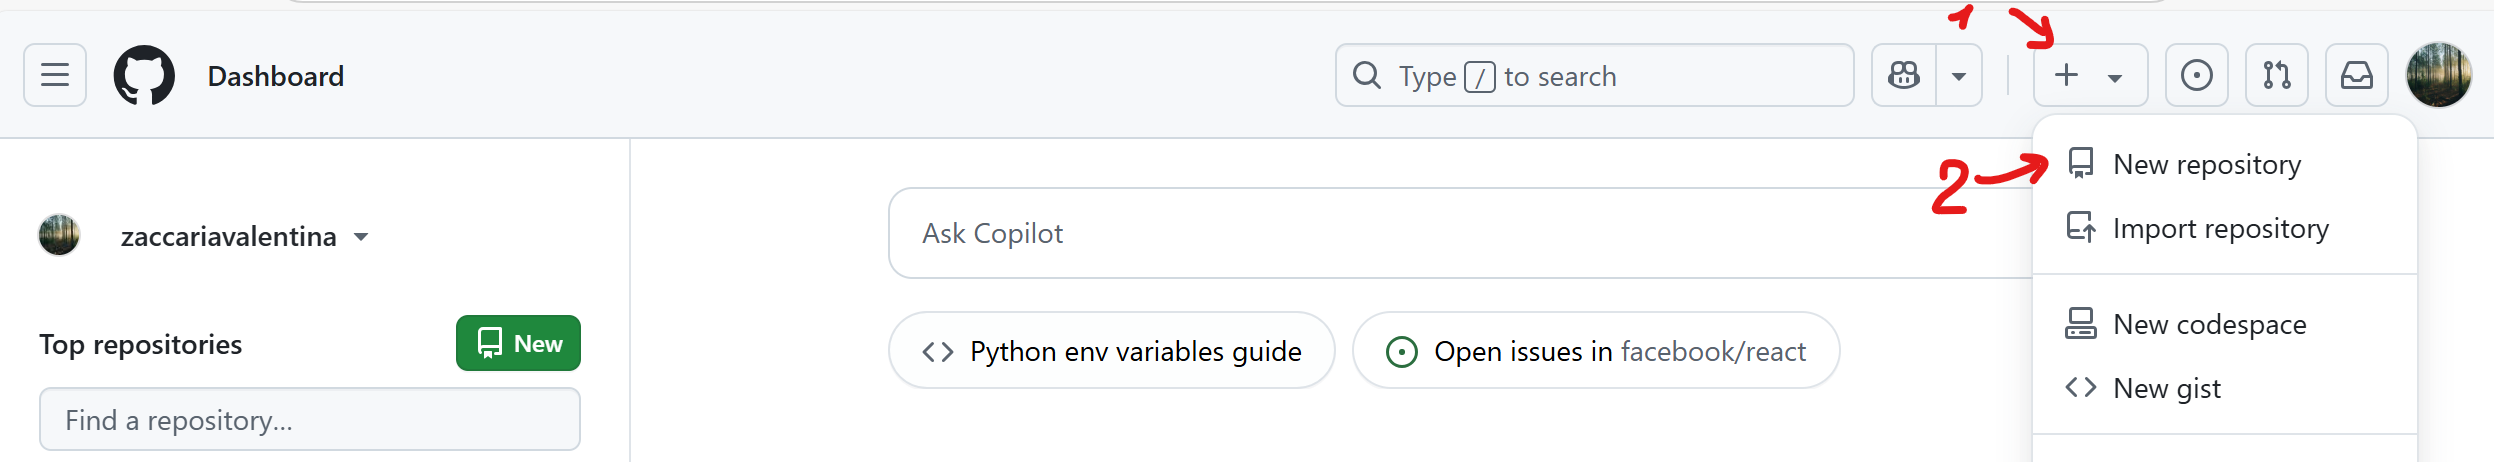

### 3.2 🔄 Connect local repository to GitHub

Once you have a local repository (see above git init) and a remote repository on GitHub, connect them: 

> 📌 **Note**: if you use `git clone REPO_URL` your local repository is already connected to the remote repository on GitHub. Skip this passage. 

Execute this command in the terminal or notebook (with !) to connect the local repository to the remote one.

```bash
# Add the remote repository (replace with your GitHub repository URL)
git remote add origin https://github.com/yourusername/your-repo.git
```

### 3.3 🔐 GitHub Authentication (HTTPS)

When pushing to GitHub, you must authenticate to verify your identity. GitHub will warn you and deny the push with an error like: 

```sh
remote: Support for password authentication was removed on August 13, 2021.
fatal: Authentication failed for 'https://github.com/yourusername/your-repo.git/'
```

Solution: authenticate. 

1. Generate a Personal Access Token (PAT): 
    - go to **GitHub > Settings > Developer settings > Personal access tokens**. 
    - click **Generate new token (classic)**.
    - set expiration, in 'select scopes' flag 'repo' and click on Generate token green button. 
    - copy and **save** it (you won't see it again). 

2. Use the PAT for authentication: when pushing code, Git will prompt you for credentials. Enter: 
    - Username: your GitHub username
    - Password: your PAT. 

> ⚠️ **Warning**: the PAT is not displayed when entered for security reasons - just paste it and press Enter. 

### 3.3 ⬆️ Push changes to GitHub

```bash
# before pushing, you need to add the files to the staging area and 
# commit them. Only committed files can be pushed to the remote repository.
git add .
git commit -m "Your commit message"
```

After commiting changes locally, you can push them to GitHub:

```bash
# Push to the remote repository (default branch is usually 'main')
git push -u origin main
```

### 3.4 ⬇️ Pull changes from GitHub

To update your local repository with changes made by others. 

```bash
git pull origin main
```

## 📖 Official documentation

- Git Cheat Sheet → [Git Cheat Sheet](https://training.github.com/downloads/github-git-cheat-sheet.pdf)
- Git Book (free and comprehensive) → [Pro Git](https://git-scm.com/book/en/v2)
- GitHub Docs (Guide & API) → [GitHub Docs](https://docs.github.com/en)
